In [1]:
import os
import pandas as pd
s ='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)
df = pd.read_csv(s,
header=None,
encoding='utf-8')

df.tail(5)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


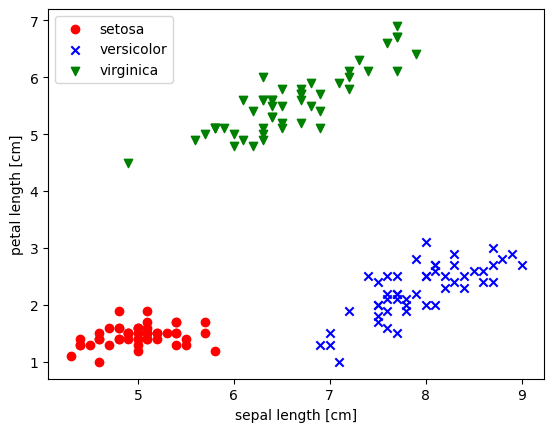

In [54]:
import numpy as np
names = df.iloc[:, 4].values
y = [0, 0, 0]
y[0] = np.where(names == 'Iris-setosa', 1, -1)
y[1] = np.where(names == 'Iris-versicolor', 1, -1)
y[2] = np.where(names == 'Iris-virginica', 1, -1)


X = df.iloc[:, [0, 2]].values
%matplotlib inline
import matplotlib.pyplot as plt
X[50:100, 0] += 2   # przesunięcie zbioru versicolor w prawo
X[50:100, 1] -= 2   # przesunięcie zbioru versicolor w dół
# problem staje się liniowo separowalny

plt.scatter(X[:50, 0], X[:50, 1],
color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
color='green', marker='v', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [55]:
import numpy as np
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
class SLP(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    self.errors_ = []
    self.perceptrons_ = []
    for i in range(0, len(y)):
      self.perceptrons_.append(Perceptron(eta=self.eta, n_iter=self.n_iter, random_state=self.random_state))
      self.perceptrons_[i].fit(X, y[i])
      if len(self.errors_) == 0:
        self.errors_ = self.perceptrons_[i].errors_
      else:
        self.errors_ = [sum(j) for j in zip(self.errors_, self.perceptrons_[i].errors_)]

  def predict(self, X):
    self.predictions = [0] * len(self.perceptrons_)
    for i in range(0, len(self.perceptrons_)):
      self.predictions[i] = self.perceptrons_[i].predict(X)
    return self.predictions
  
  def misclassified(self, y):
    result = 0
    predictions = self.predictions
    predictions = [list(map(lambda x: int(x * (-1)), i)) for i in predictions]
    for i in range(0, len(y)):
      result =  result + (sum(map(lambda x: abs(x) // 2, map(sum, zip(predictions[i], y[i])))))
    return result

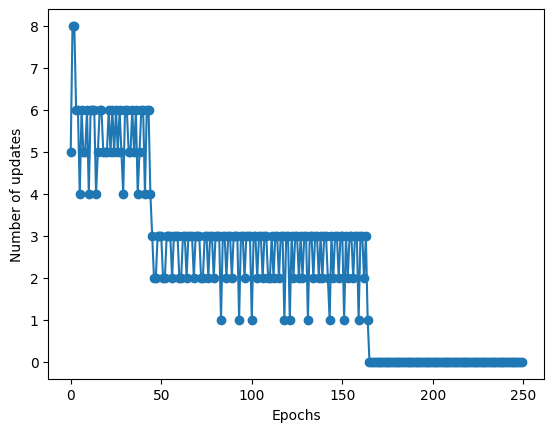

In [59]:
slp = SLP(eta=0.01, n_iter=250)
slp.fit(X, y)
plt.plot(range(0, len(slp.errors_) ), slp.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [60]:
print(slp.predict(X))

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,

In [61]:
print(slp.misclassified(y))

0
